Stephen Hutchings

Fraudulent Transactions

3/27/2019

Importing the necessary libraries.

In [1]:
import pandas as pd

import numpy as np

from itertools import cycle

import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import operator

from math import exp
from math import sqrt
import math

import gc

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

Reading in the data sets.

In [2]:
set_a = pd.read_csv('Set-A.X.csv')
set_b = pd.read_csv('Set-B.X.csv')
class_labels_a = pd.read_csv('Set-A.y.csv', header = None)
class_labels_b = pd.read_csv('Set-B.y.csv', header = None)

In [3]:
set_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 19 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
state1        94682 non-null object
zip1          94682 non-null int64
field1        94682 non-null int64
domain1       94681 non-null object
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 13.7+ MB


In [4]:
set_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 14.5+ MB


In [5]:
y = class_labels_a.values
y = y.reshape((y.shape[0], 1))

Converting the object variables into numerical variables using sklearns label encoder function.

In [6]:
le = LabelEncoder()
set_a['state1'] = le.fit_transform(set_a['state1'])
set_a['domain1'] = le.fit_transform(set_a['domain1'].astype(str))

In [7]:
set_b['state1'] = le.fit_transform(set_b['state1'].astype(str))
set_b['custAttr2'] = le.fit_transform(set_b['custAttr2'])

In [8]:
set_a.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,6,925,3,276,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,6,925,3,276,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,6,928,3,3021,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,33,77,0,276,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,6,945,3,9146,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [9]:
gc.collect()

11

In [10]:
#Converting the pandas dataframes to numpy matrices
set_a_np = set_a.values
set_b_np = set_b.values

Splitting the data into training and testing data sets.

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(set_a_np, y, test_size=0.2, random_state=42)

In [12]:
print("The length of the test set is %s" % (len(x_te)))
print("\n"+"*"*50+"\n")
print("The length of the training set is %s" % (len(x_tr)))

The length of the test set is 18937

**************************************************

The length of the training set is 75745


In [13]:
#normalizing the values
y_scaler = preprocessing.MinMaxScaler()
x_scaler = preprocessing.MinMaxScaler()

x_tr = x_scaler.fit_transform(x_tr)

x_tr = np.concatenate((np.ones((75745,1), dtype=float), x_tr), axis=1)
x_te = np.concatenate((np.ones((18937,1), dtype=float), x_te), axis=1)

The functions for the logistic regression classifier.

In [14]:
def sigmoid(z):
    y_hat = (1.0 / (1+np.exp(-Z)))
    return y_hat

def logistic_loss(y, y_hat):
    return -np.mean(y* np.log(y_hat) + (1-y) * np.log(1 - y_hat))

def mini_batch_gradient_descent(x, y, w, learning_rate, epochs, batch_size):
    m = len(y)
    cost_history = np.zeros(epochs)
    num_batches = int(m / batch_size)
    
    for it in range(0, epochs):
        cost = 0.0
        for i in range(0, m, batch_size):
            x_b = x[i:i+batch_size]
            y_b = y[i:i+batch_size]
            z = np.dot(x_b, w)
            y_hat = sigmoid(z)
            difference = y_b - y_hat
            gradient = np.dot(x_b.T, difference) * 1/m
            w -= learning_rate*gradient
            cost += logistic_loss(y_b, y_hat)
        cost_history[it] = cost
    
    return w

def predictive_labels(x, w):
    z = np.dot(x,w)
    predictive_prob = sigmoid(z)
    predictive_values = np.where(predictive_prob >= 0.98, 0, 1)
    return predictive_values

def confusion_matrix_statistics(tp, fp, tn, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("The accuracy of the model is %s" %(accuracy))
    precision = tp / (tp + fp)
    print("The precision of the model is %s" %(precision))
    recall = tp / (tp + fn)
    print("The recall of the model is %s" %(recall))
    f1Score = 2 * ((recall * precision) / (recall + precision))
    print("The F1 score of the model is %s" %(f1Score))

10-fold Cross Validation, run multiple times with different hyper perameters. The confusion matrix its statistics are shown in order to evaluate the different hyper perameters and how they performed.

In [15]:
epochs = 1
learning_rate = 0.01
batch_size = 4
w = np.random.rand(20, 1)

kf = KFold(n_splits = 10)
for train, test in kf.split(x_tr):
    k_x_tr, k_x_te = x_tr[train], x_tr[test] 
    k_y_tr, k_y_te = y_tr[train], y_tr[test]
    w_values = mini_batch_gradient_descent(k_x_tr, k_y_tr, w, learning_rate, epochs, batch_size)
    y_pred = predictive_labels(k_x_tr, w_values)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, y_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    batch_size = batch_size * 2
    learning_rate = learning_rate + 0.01
    print("\n")

The accuracy of the model is 0.2263752383746516
The precision of the model is 0.02445046784494282
The recall of the model is 0.873342175066313
The F1 score of the model is 0.04756916853283248


The accuracy of the model is 0.2654100044007628
The precision of the model is 0.02475635054209558
The recall of the model is 0.8383035122597747
The F1 score of the model is 0.048092459178436325


The accuracy of the model is 0.3291623881472789
The precision of the model is 0.026162853037678797
The recall of the model is 0.7922077922077922
The F1 score of the model is 0.050652882439642104


The accuracy of the model is 0.4202875165028605
The precision of the model is 0.027142785995318493
The recall of the model is 0.7073329007138222
The F1 score of the model is 0.05227943116141874


The accuracy of the model is 0.5340765732727006
The precision of the model is 0.028762854471798067
The recall of the model is 0.6080368906455863
The F1 score of the model is 0.05492739823851464


The accuracy of the m

Training the logistic linear regression on the entire training set.

In [16]:
epochs = 1
learning_rate = 0.01
batch_size = 4
w = np.random.rand(20, 1)

w_values_test = mini_batch_gradient_descent(x_tr, y_tr, w, learning_rate, epochs, batch_size)

In [17]:
y_pred_tr = predictive_labels(x_tr, w_values_test)

In [18]:
confusion_matrix(y_tr, y_pred_tr)

array([[ 1085, 72969],
       [   15,  1676]], dtype=int64)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_tr, y_pred_tr).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.03645125090765067
The precision of the model is 0.022452943934623885
The recall of the model is 0.9911295091661738
The F1 score of the model is 0.043911129742192405


In [20]:
the_auc = roc_auc_score(y_tr, y_pred_tr)
print("The AUC score is %s" %the_auc)

The AUC score is 0.5028904898573463


In [21]:
fpr, tpr, thresholds = roc_curve(y_tr, y_pred_tr)

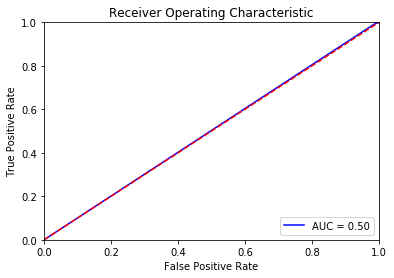

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Testing the logistic regression on the test data set.

In [23]:
y_pred_te = predictive_labels(x_te, w_values_test)

In [24]:
confusion_matrix(y_te, y_pred_te)

array([[17094,  1440],
       [  326,    77]], dtype=int64)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_te, y_pred_te).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.9067434123673233
The precision of the model is 0.05075807514831905
The recall of the model is 0.19106699751861042
The F1 score of the model is 0.08020833333333333


In [26]:
the_auc = roc_auc_score(y_te, y_pred_te)
print("The AUC score is %s" %the_auc)

The AUC score is 0.5566859752889264


In [27]:
fpr, tpr, thresholds = roc_curve(y_te, y_pred_te)

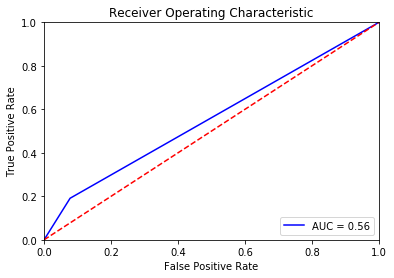

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

My classifier is showing signs of underfitting. It is not predicting the training or the test data particularly well. The only positive is that my classifier performed similarly on both the testing and training data, but once again it is not doing a good job classifying either set of data. At this point I do not have a solution for this problem as I have attempted to tweak the hyper-perameters of my classifier and the algorithm itself, but have had no luck in doing so.

Because the data is very skewed towards the non-fraudulent class label, I refitted the data. I used a strategy called undersampling, in which an equal number of samples of both labels are taken and put into a new data set. I then run the logistic regression classifier on this more evenly skewed data-set, albeit with many less samples. This same data set will be used for the naive bayes (NB) and kNN classifier.

In [29]:
the_set_a = set_a.add(class_labels_a, fill_value = 0)
the_set_a = the_set_a.rename(columns={the_set_a.columns[-1]: "label" })
num_frauds = len(the_set_a[the_set_a['label'] == 1])
non_f_indices = the_set_a[the_set_a.label == 0].index
random_indices = np.random.choice(non_f_indices,num_frauds, replace=False)
fraud_indices = the_set_a[the_set_a.label == 1].index
under_sampled_indices = np.concatenate([fraud_indices,random_indices])
under_sampled_data = the_set_a.loc[under_sampled_indices]
usd_np = under_sampled_data.values
np.random.shuffle(usd_np)
y_us = usd_np[:, -1] 
x_us = usd_np[:, :-1] 

C:\Users\steph\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [30]:
y_us = y_us.reshape((y_us.shape[0], 1))
x_us_tr, x_us_te, y_us_tr, y_us_te = train_test_split(x_us, y_us, test_size=0.2, random_state=42)
x_us_tr = x_scaler.fit_transform(x_us_tr)
x_us_tr = np.concatenate((np.ones((3350,1), dtype=float), x_us_tr), axis=1)
x_us_te = np.concatenate((np.ones((838,1), dtype=float), x_us_te), axis=1)

In [31]:
epochs = 1
learning_rate = 0.001
batch_size = 16
w = np.random.rand(20, 1)

kf = KFold(n_splits = 10)
for train, test in kf.split(x_us_tr):
    k_x_tr, k_x_te = x_us_tr[train], x_us_tr[test] 
    k_y_tr, k_y_te = y_us_tr[train], y_us_tr[test]
    w_values = mini_batch_gradient_descent(k_x_tr, k_y_tr, w, learning_rate, epochs, batch_size)
    y_pred = predictive_labels(k_x_tr, w_values)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, y_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    batch_size = batch_size * 2
    learning_rate = learning_rate + 0.001
    print("\n")

The accuracy of the model is 0.538971807628524
The precision of the model is 0.5177009579341941
The recall of the model is 0.8427118644067797
The F1 score of the model is 0.6413828689370485


The accuracy of the model is 0.5446102819237147
The precision of the model is 0.5258294834103318
The recall of the model is 0.8368983957219251
The F1 score of the model is 0.6458602011864844


The accuracy of the model is 0.547927031509121
The precision of the model is 0.5303285593934288
The recall of the model is 0.8354346383543464
The F1 score of the model is 0.6488018551919609


The accuracy of the model is 0.5485903814262023
The precision of the model is 0.5294616362865621
The recall of the model is 0.8326666666666667
The F1 score of the model is 0.6473179580202124


The accuracy of the model is 0.547927031509121
The precision of the model is 0.5282617934551637
The recall of the model is 0.8308823529411765
The F1 score of the model is 0.6458820472850092


The accuracy of the model is 0.5479270

The accuracy of the model is 0.5050746268656716
The precision of the model is 0.5010961478233636
The recall of the model is 0.960960960960961
The F1 score of the model is 0.6587072869493619
The AUC score is 0.5077801837445755


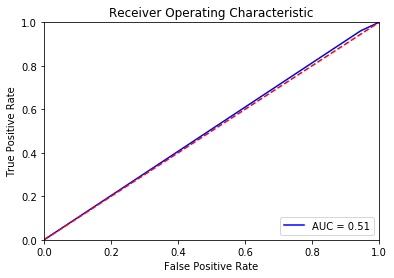

In [32]:
epochs = 1
learning_rate = 0.12
batch_size = 32
w = np.random.rand(20, 1)
w_values_test_us = mini_batch_gradient_descent(x_us_tr, y_us_tr, w, learning_rate, epochs, batch_size)
y_us_pre_tr = predictive_labels(x_us_tr, w_values_test_us)

confusion_matrix(y_us_tr, y_us_pred_tr)
tn, fp, fn, tp = confusion_matrix(y_us_tr, y_us_pred_tr).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_us_tr, y_us_pred_tr)
print("The AUC score is %s" %the_auc)
fpr, tpr, thresholds = roc_curve(y_us_tr, y_us_pred_tr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy of the model is 0.5322195704057279
The precision of the model is 0.6504065040650406
The recall of the model is 0.1864801864801865
The F1 score of the model is 0.2898550724637681
The AUC score is 0.540672856076279


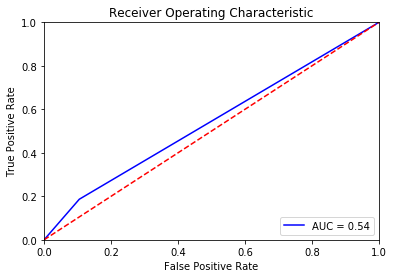

In [33]:
y_us_pred_te = predictive_labels(x_us_te, w_values_test_us)
tn, fp, fn, tp = confusion_matrix(y_us_te, y_us_pred_te).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_us_te, y_us_pred_te)
print("The AUC score is %s" %the_auc)
fpr, tpr, thresholds = roc_curve(y_us_te, y_us_pred_te)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
confusion_matrix(y_us_te, y_us_pred_te)

array([[366,  43],
       [349,  80]], dtype=int64)

The logistic regression classifier once again is not predicting the class labels very well. The F1-Score, precision, and recall scores are much better compared to the original data set. But it is still making many false negative and false positive predictions. It is under-fitting the training data, and not performing well on the test data.

Preparing the data set for the bayesian classifier. This means adding the labels into the dataset so that the probabilities, means, and standard deviations for the different labels can be calculated.

In [35]:
the_set_a = set_a.add(class_labels_a, fill_value = 0)

C:\Users\steph\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [36]:
#Renaming the label column 
the_set_a = the_set_a.rename(columns={the_set_a.columns[-1]: "label"})
the_set_a.columns

Index(['amount', 'hour1', 'state1', 'zip1', 'field1', 'domain1', 'field2',
       'hour2', 'flag1', 'total', 'field3', 'field4', 'field5', 'indicator1',
       'indicator2', 'flag2', 'flag3', 'flag4', 'flag5', 'label'],
      dtype='object')

Calculating the prioor probabilities, the means, and the standard deviations.

In [37]:
num_zero = the_set_a.label.value_counts()[0.0]
num_one = the_set_a.label.value_counts()[1.0]
total_labels = num_one + num_zero
prior_zero = float(num_zero / total_labels)
prior_one = float(num_one / total_labels)

In [38]:
data_variance = the_set_a.groupby(['label']).var()
data_variance

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
label,,,,,,,,,,,,,,,,,,,
0.0,200.488337,26.875313,238.390732,99620.251220,0.993762,1.102034e+07,0.244507,26.827692,0.247617,200.697318,1.503151e+07,42.619951,5.855711,0.099810,0.017972,0.248359,0.239052,0.018689,8161.196094
1.0,235.412060,31.665050,244.676518,90051.960902,1.233089,1.226922e+07,0.242395,32.038526,0.248904,236.668340,2.694613e+07,29.596248,6.612684,0.128196,0.020581,0.245647,0.224818,0.053625,115734.635751


In [39]:
data_means = the_set_a.groupby(['label']).mean()
data_means

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
label,,,,,,,,,,,,,,,,,,,
0.0,25.685556,13.992396,22.750378,542.149425,2.405344,4047.396034,0.425865,14.002355,0.548840,25.677056,753.257236,14.039930,1.367305,0.112455,0.018307,0.540545,0.395354,0.019052,4.961928
1.0,23.413720,8.219675,20.995224,591.629895,3.031996,3930.396371,0.412130,8.282713,0.465138,23.376614,-998.612225,11.516237,1.746418,0.150907,0.021012,0.566858,0.659026,0.056829,59.887775


In [40]:
zero_mean = data_means.iloc[0]
one_mean = data_means.iloc[1]
zero_dev = data_dariance.iloc[0]
one_dev = data_variance.iloc[1]

In [41]:
one_dev_np = one_dev.values
one_mean_np = one_mean.values
zero_dev_np = zero_dev.values
zero_mean_np = zero_mean.values

The functions necessary for computing the posterior probabilities using the Guassian method.

In [42]:
def guassian_probability_density_function(x, the_mean, the_variance):
    m = len(x) 
    col = len(x[0]) 
    g_probability = np.zeros((len(x), len(x[0])))
    for it in range(0, m):
        for i in range(0, col):
            g_probability[it][i] = 1/(np.sqrt(2*np.pi*the_variance[i])) * np.exp((-(x[it][i]-the_mean[i]**2)/(2*the_variance[i])))
    return g_probability

def the_probability(g_probabilities, prior):
    m = len(g_probabilities) 
    col = len(g_probabilities[0]) 
    the_probability = np.full((len(g_probabilities), 1), prior)
    for it in range(0, m):
        for i in range(0, col):
            the_probability[it] = the_probability[it] * g_probabilities[it][i]  
    return the_probability

def compare_probabilities(p_zeros, p_ones):
    m = len(p_zeros) 
    the_predictions = np.full((len(p_peros), 1), 2)
    for it in range (0, m):
        if p_zeros[it] >= p_ones[it]:
            the_predictions[it] = 0
        else:
            the_predictions[it] = 1
    return the_predictions

In [43]:
#Resetting the training sets to not include the labels
x_tr, x_te, y_tr, y_te = train_test_split(set_a_np, y, test_size=0.2, random_state=42)

Running the NB classifier on the 5-fold cross validation sets.

In [44]:
kf = KFold(n_splits = 5)
for train, test in kf.split(x_tr):
    k_x_tr, k_x_te = x_tr[train], x_tr[test] 
    k_y_tr, k_y_te = y_tr[train], y_tr[test]
    one_prob = guassian_probability_density_function(k_x_tr, one_mean_np, one_dev_np)
    one_probability = the_probability(one_prob, prior_one)
    zero_prob = guassian_probability_density_function(k_x_tr, zero_mean_np, zero_dev_np)
    zero_probability = the_probability(zero_prob, prior_zero)
    bayesian_pred = compare_probabilities(zero_probability, one_probability)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, bayesian_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    print("\n")

The accuracy of the model is 0.960938015710608
The precision of the model is 0.07301066447908121
The recall of the model is 0.06711915535444947
The F1 score of the model is 0.0699410609037328


The accuracy of the model is 0.9596508020331375
The precision of the model is 0.06296603148301574
The recall of the model is 0.05467625899280575
The F1 score of the model is 0.05852907200616095


The accuracy of the model is 0.9605584527031488
The precision of the model is 0.06422018348623854
The recall of the model is 0.05724907063197026
The F1 score of the model is 0.060534591194968554


The accuracy of the model is 0.9601293814773252
The precision of the model is 0.06611570247933884
The recall of the model is 0.05856515373352855
The F1 score of the model is 0.062111801242236024


The accuracy of the model is 0.9604924417453298
The precision of the model is 0.06430338004946413
The recall of the model is 0.05833956619296934
The F1 score of the model is 0.0611764705882353




Running the NB classifier on the training data set.

In [45]:
one_prob = guassian_probability_density_function(x_tr, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_tr, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_tr, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.9603538187339098
The precision of the model is 0.06613756613756613
The recall of the model is 0.05913660555884092
The F1 score of the model is 0.062441461130190445


The AUC score is 0.5200347191782646




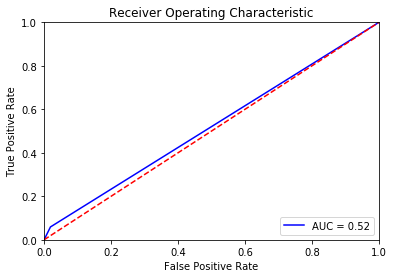

In [46]:
the_auc = roc_auc_score(y_tr, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_tr, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Running the NB classifier on the test set, practically this means that the mean and standard deviations are the values used from the training set.

In [47]:
one_prob = guassian_probability_density_function(x_te, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_te, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_te, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.961134287373924
The precision of the model is 0.05121293800539083
The recall of the model is 0.04714640198511166
The F1 score of the model is 0.049095607235142114


In [48]:
confusion_matrix(y_te, bayesian_pred)

array([[18182,   352],
       [  384,    19]], dtype=int64)

The AUC score is 0.5140771396997965




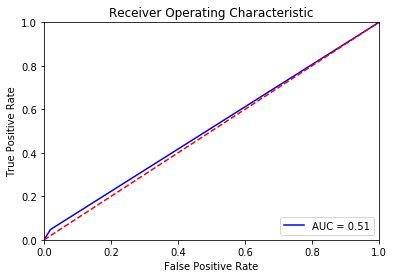

In [49]:
the_auc = roc_auc_score(y_te, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_te, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The NB classifier is very similar to the logistic regression classifier in that the ex_treme amount of data that is labeled as "0" is impacting the classifiers ability to correctly classify the test samples. It seems to be massively under-fitting the training data. Because of this it seems that the data set is under fitting. I think that the biggest work around for this is that the data set needs to be adjusted in someway so that the volume of labeled "0" is not so high in comparison to the data that is labeled as "1". I explore this hypothesis by using the new data set that is under-sampled.

In [50]:
#Getting the data ready
num_zero = under_sampled_data.label.value_counts()[0.0]
num_one = under_sampled_data.label.value_counts()[1.0]
total_labels = num_one + num_zero
prior_zero = float(num_zero / total_labels)
prior_one = float(num_one / total_labels)
data_variance = under_sampled_data.groupby(['label']).var()
data_means = under_sampled_data.groupby(['label']).mean()
zero_mean = data_means.iloc[0]
one_mean = data_means.iloc[1]
zero_dev = data_variance.iloc[0]
one_dev = data_variance.iloc[1]
one_dev_np = one_dev.values
one_mean_np = one_mean.values
zero_dev_np = zero_dev.values
zero_mean_np = zero_mean.values

x_us_tr, x_us_te, y_us_tr, y_us_te = train_test_split(x_us, y_us, test_size=0.2, random_state=42)
x_us_tr = x_scaler.fit_transform(x_us_tr)

In [51]:
kf = KFold(n_splits = 5)
for train, test in kf.split(x_us_tr):
    k_x_tr, k_x_te = x_us_tr[train], x_us_tr[test] 
    k_y_tr, k_y_te = y_us_tr[train], y_us_tr[test]
    one_prob = guassian_probability_density_function(k_x_tr, one_mean_np, one_dev_np)
    one_probability = the_probability(one_prob, prior_one)
    zero_prob = guassian_probability_density_function(k_x_tr, zero_mean_np, zero_dev_np)
    zero_probability = the_probability(zero_prob, prior_zero)
    bayesian_pred = compare_probabilities(zero_probability, one_probability)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, bayesian_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    print("\n")

The accuracy of the model is 0.5305970149253731
The precision of the model is 0.75
The recall of the model is 0.055130168453292494
The F1 score of the model is 0.10271041369472181


The accuracy of the model is 0.5164179104477612
The precision of the model is 0.75
The recall of the model is 0.05141579731743666
The F1 score of the model is 0.09623430962343095


The accuracy of the model is 0.5223880597014925
The precision of the model is 0.7872340425531915
The recall of the model is 0.05547226386806597
The F1 score of the model is 0.10364145658263307


The accuracy of the model is 0.5182835820895523
The precision of the model is 0.7708333333333334
The recall of the model is 0.055100521221146684
The F1 score of the model is 0.10284920083391243


The accuracy of the model is 0.5212686567164179
The precision of the model is 0.7888888888888889
The recall of the model is 0.05318352059925094
The F1 score of the model is 0.09964912280701754




The accuracy of the model is 0.5217910447761194
The precision of the model is 0.7692307692307693
The recall of the model is 0.05405405405405406
The F1 score of the model is 0.10101010101010101
The AUC score is 0.5190151575908252




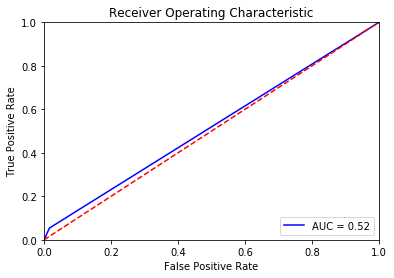

In [52]:
one_prob = guassian_probability_density_function(x_us_tr, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_us_tr, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_us_tr, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_us_tr, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_us_tr, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy of the model is 0.5119331742243437
The precision of the model is 0.7631578947368421
The recall of the model is 0.0675990675990676
The F1 score of the model is 0.12419700214132762
The AUC score is 0.5227970888117587




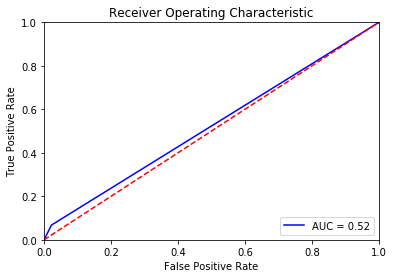

In [53]:
one_prob = guassian_probability_density_function(x_us_te, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_us_te, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_us_te, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_us_te, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_us_te, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
confusion_matrix(y_us_te, bayesian_pred)

array([[400,   9],
       [400,  29]], dtype=int64)

Similarly to the logistical regression classifier, the NB classifier is not performing to expecations with the new data set. Its F1-Score and Recall are much better than on data set A. However it is still making a ton of false negative and false positive classifications. Interestingly, it performed a lot better when cross validation was used to test the model. It is still under-fitting the training data. 

k-Nearest Neighbor

In [55]:
x_tr, x_te, y_tr, y_te = train_test_split(set_a_np, y, test_size=0.2, random_state=42)

In [56]:
#Normalizing the data
x_tr = x_scaler.fit_transform(x_tr)

x_tr = np.concatenate((np.ones((75745,1), dtype=float), x_tr), axis=1)
x_te = np.concatenate((np.ones((18937,1), dtype=float), x_te), axis=1)

In [57]:
train = np.concatenate((x_tr, y_tr), axis=1)
test = np.concatenate((x_te, y_te), axis=1)

The functions to calculate the euclidean distance, gather the specified number of neighbors, and make a prediction on the class labels of those neighbors.

In [58]:
def distance_and_predict(x_tr, y_tr, x_te, k):
    distances = []
    targets = []
    for i in range(len(x_tr)):
        distance = np.sqrt(np.sum(np.square(x_te - x_tr[i, :])))
        distances.append([distance, i])
    
    distances = sorted(distances)
    
    for i in range(k):
        index = distances[i][1]
        targets.append(y_tr[index])
        
    targets = np.array(targets)
    targets = targets.astype(int)
    targets = np.squeeze(targets)
    count = np.bincount(targets).argmax()

    return count

def k_nearest_neighbor(x_tr, y_tr, x_te, predictions, k):
    for i in range(len(x_te)):
        predictions.append(distance_and_predict(x_te, y_tr, x_te[i, :], k))

Cross validation using different values of k, starting at k = 2.

In [59]:
k = 2

kf = KFold(n_splits = 10)
for train, test in kf.split(x_tr):
    k_x_tr, k_x_te = x_tr[train], x_tr[test] 
    k_y_tr, k_y_te = y_tr[train], y_tr[test]
    predictions = []
    k_nearest_neighbor(k_x_tr, k_y_tr, k_x_te, predictions, k)
    predictions = np.asarray(predictions)
    tn, fp, fn, tp = confusion_matrix(k_y_te, predictions).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    k = k + 1
    print("\n")

The accuracy of the model is 0.975049504950495
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


The accuracy of the model is 0.9753135313531354
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.98006600660066
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


The accuracy of the model is 0.98006600660066
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9771617161716172
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9770266701874835
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9796672828096118
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9775547927119091
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9745180881964616
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9787430683918669
The precision of the model is nan
The recall of the model is 0.0
T

The way that my implementation of the kNN classifier functions is that it calculates the euclidean distances between the training and test sets, and then attempts to predict the classifers of the test set.

In [60]:
predictions = []
k_nearest_neighbor(x_tr, y_tr, x_te, predictions, k = 3)
predictions = np.asarray(predictions)

In [61]:
tn, fp, fn, tp = confusion_matrix(y_te, predictions).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.9769762898030311
The precision of the model is 0.02857142857142857
The recall of the model is 0.0024813895781637717
The F1 score of the model is 0.004566210045662101


In [62]:
confusion_matrix(y_te, predictions)

array([[18500,    34],
       [  402,     1]], dtype=int64)

The AUC score is 0.5003234615960312




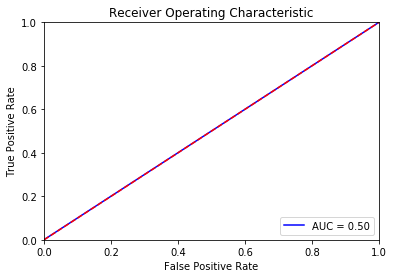

In [63]:
the_auc = roc_auc_score(y_te, predictions)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_te, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The kNN classifier is making a very large proportion of false negative labels. I'm not sure of the reason for this. In comparison to all of the other classifiers, the kNN is under-fitting the test data to the largest degree and making the large percentage of false negative classifications.

In [64]:
y_us = y_us.reshape((y_us.shape[0], 1))
x_us_tr, x_us_te, y_us_tr, y_us_te = train_test_split(x_us, y_us, test_size=0.2, random_state=42)
x_us_tr = xScaler.fit_transform(x_us_tr)
x_us_tr = np.concatenate((np.ones((3350,1), dtype=float), x_us_tr), axis=1)
x_us_te = np.concatenate((np.ones((838,1), dtype=float), x_us_te), axis=1)

In [65]:
k = 2

kf = KFold(n_splits = 10)
for train, test in kf.split(x_us_tr):
    k_x_tr, k_x_te = x_us_tr[train], x_us_tr[test] 
    k_y_tr, k_y_te = y_us_tr[train], y_us_tr[test]
    predictions = []
    k_nearest_neighbor(k_x_tr, k_y_tr, k_x_te, predictions, k)
    predictions = np.asarray(predictions)
    tn, fp, fn, tp = confusion_matrix(k_y_te, predictions).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    k = k + 1
    print("\n")

The accuracy of the model is 0.4746268656716418
The precision of the model is 0.574468085106383
The recall of the model is 0.28421052631578947
The F1 score of the model is 0.3802816901408451


The accuracy of the model is 0.5343283582089552
The precision of the model is 0.5305164319248826
The recall of the model is 0.6686390532544378
The F1 score of the model is 0.5916230366492147


The accuracy of the model is 0.44776119402985076
The precision of the model is 0.4117647058823529
The recall of the model is 0.3987341772151899
The F1 score of the model is 0.40514469453376206


The accuracy of the model is 0.48059701492537316
The precision of the model is 0.4792626728110599
The recall of the model is 0.6303030303030303
The F1 score of the model is 0.544502617801047


The accuracy of the model is 0.4955223880597015
The precision of the model is 0.5
The recall of the model is 0.5325443786982249
The F1 score of the model is 0.515759312320917


The accuracy of the model is 0.5492537313432836
T

In [66]:
predictions = []
k_nearest_neighbor(x_us_tr, y_us_tr, x_us_te, predictions, k = 8)
predictions = np.asarray(predictions)
tn, fp, fn, tp = confusion_matrix(y_us_te, predictions).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)
print("\n")
confusion_matrix(y_us_te, predictions)

The accuracy of the model is 0.4797136038186158
The precision of the model is 0.4889589905362776
The recall of the model is 0.3613053613053613
The F1 score of the model is 0.41554959785522794




array([[247, 162],
       [274, 155]], dtype=int64)

The AUC score is 0.48260867087272963




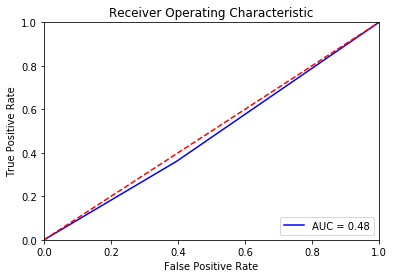

In [67]:
the_auc = roc_auc_score(y_us_te, predictions)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_us_te, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

My implementation of the kNN classifier seems to do a consistantly bad job despite the data set. Based on the above sampling, the k-value that performs best is very inconsistant. At some values of k, say 5, the model has poor metrics of accuracy, f1-score, recall, and precision. At the next k value, these metrics get better. And then when k is one bigger than that (for this example, 7), they go back down again. I think my implementation of this classifier must be flawed, but I was unable to understand why. Compared to the other classifying methods, my kNN classifier performed the worst regardless of the data set.


If I was asked to choose the best model that was least likely to miss fraudulent transactions, I would want to choose the model that correctly predicted the most true negative samples. In this situation, for this metric, the naive bayes classifier is the best classification method. The kNN method only correctly identified one fraudulent reaction, while the logistical regression correctly identified around 140 samples. The NB classifier correctly identified around 180 fraudulent transactions. Based on the fact that in this situation you are trying to identify which model gets the most true negative classifications, the NB classifier performed the best.

If the company was looking for the model that makes the least amount of false fraudulent classifications (false negatives), the best model is technically the kNN classifier. For the test sample, the kNN model classified only around 30 false fraudulent classifications. However this comes with the caveat that it made only 1 correct fraudulent classification. On the other hand, the logistical regression classifier made almost as many correct fraudulent (true negative) transactions as the NB classifier, but about 3000 less false fraudulent classifications. Taking all of this into account, since the kNN classifier wasn't able to correctly classify false transactions, my recommendation would be the logistic regression classifier. However Based strictly on a cost-matrix analysis, kNN would have less of a cost from false negatives.

Overall, I think the best model for Coinbank is the logistical regression. The logistical regression classifier had the highest F1-scores, a low amount of false negative classifications, a good amount of true negative (fraudulent) classifications, and the highest AUC score. The logistical regression classifier had the most consistent and best performance for data set A.

Repeating the analysis on data set B.

Preparing the Dataset.

In [68]:
y_b = class_labels_b.values
y_b = y_b.reshape((y_b.shape[0], 1))

x_b_tr, x_be_te, y_b_tr, y_b_te = train_test_split(set_b_np, y_b, test_size=0.2, random_state=42)

x_b_tr = x_scaler.fit_transform(x_b_tr)

x_b_tr = np.concatenate((np.ones((80000,1), dtype=float), x_b_tr), axis=1)
x_be_te = np.concatenate((np.ones((20000,1), dtype=float), x_be_te), axis=1)

In [69]:
epochs = 1
learning_rate = 0.001
batch_size = 16
w = np.random.rand(20, 1)

kf = KFold(n_splits = 10)
for train, test in kf.split(x_b_tr):
    k_x_tr, k_x_te = x_b_tr[train], x_b_tr[test] 
    k_y_tr, k_y_te = y_b_tr[train], y_b_tr[test]
    w_values = mini_batch_gradient_descent(k_x_tr, k_y_tr, w, learning_rate, epochs, batch_size)
    y_pred = predictive_labels(k_x_tr, w_values)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, y_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    batch_size = batch_size * 2
    learning_rate = learning_rate + 0.001
    print("\n")

The accuracy of the model is 0.9294027777777778
The precision of the model is 0.024857741838873914
The recall of the model is 0.043455497382198956
The F1 score of the model is 0.031625071442179464


The accuracy of the model is 0.9303888888888889
The precision of the model is 0.02451731535396874
The recall of the model is 0.041906757464641176
The F1 score of the model is 0.030935808197989176


The accuracy of the model is 0.9313472222222222
The precision of the model is 0.024772656005017248
The recall of the model is 0.04131799163179916
The F1 score of the model is 0.03097431876102725


The accuracy of the model is 0.9329027777777777
The precision of the model is 0.024398178269355888
The recall of the model is 0.03932878867330886
The F1 score of the model is 0.03011443485243927


The accuracy of the model is 0.935
The precision of the model is 0.02367879203843514
The recall of the model is 0.03623949579831933
The F1 score of the model is 0.028642590286425906


The accuracy of the model

The accuracy of the model is 0.6774625
The precision of the model is 0.026767878545745107
The recall of the model is 0.3170847136772362
The F1 score of the model is 0.049368161220204106
The AUC score is 0.5021619595964596


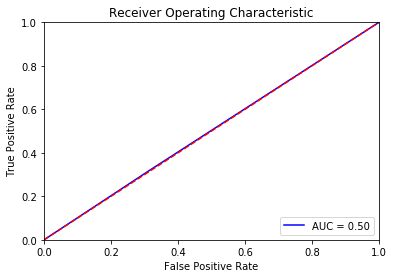

In [70]:
epochs = 1
learning_rate = 0.001
batch_size = 64
w = np.random.rand(20, 1)

w_values_test_b = mini_batch_gradient_descent(x_b_tr, y_b_tr, w, learning_rate, epochs, batch_size)

y_b_pred_tr = predictive_labels(x_b_tr, w_values_test_b)

confusion_matrix(y_b_tr, y_b_pred_tr)

tn, fp, fn, tp = confusion_matrix(y_b_tr, y_b_pred_tr).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_b_tr, y_b_pred_tr)
print("The AUC score is %s" %the_auc)

fpr, tpr, thresholds = roc_curve(y_b_tr, y_b_pred_tr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy of the model is 0.97295
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan
The AUC score is 0.5


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


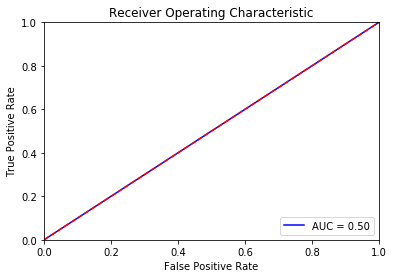

In [71]:
y_b_pred_te = predictive_labels(x_be_te, w_values_test_b)
confusion_matrix(y_b_te, y_b_pred_te)

tn, fp, fn, tp = confusion_matrix(y_b_te, y_b_pred_te).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_b_te, y_b_pred_te)
print("The AUC score is %s" %the_auc)

fpr, tpr, thresholds = roc_curve(y_b_te, y_b_pred_te)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
confusion_matrix(y_b_te, y_b_pred_te)

array([[19459,     0],
       [  541,     0]], dtype=int64)

Naive Bayesian classifier on data set B

In [73]:
the_set_b = set_b.add(class_labels_b, fill_value = 0)

#Renaming the label column 
the_set_b = the_set_b.rename(columns={the_set_b.columns[-1]: "label" })
the_set_b.columns

num_zero = the_set_b.label.value_counts()[0.0]
num_one = the_set_b.label.value_counts()[1.0]
total_labels = num_one + num_zero
prior_zero = float(num_zero / total_labels)
prior_one = float(num_one / total_labels)

C:\Users\steph\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [74]:
data_variance = the_set_b.groupby(['label']).var()
data_variance

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
label,,,,,,,,,,,,,,,,,,,
0.0,209.029245,29.504875,246.584259,101151.196700,3.982633e+08,0.982303,4.099843e+08,0.241294,29.443198,0.243127,209.029245,1.718295e+07,41.724214,0.099738,0.016722,0.246572,0.237584,0.013586,7151.717635
1.0,227.973165,22.244257,215.353319,81458.095747,4.420738e+08,1.300910,4.875400e+08,0.229801,22.186381,0.249832,227.973165,1.901660e+07,33.666739,0.127785,0.046261,0.249548,0.250074,0.011916,915963.368649


In [75]:
data_means = the_set_b.groupby(['label']).mean()
data_means

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
label,,,,,,,,,,,,,,,,,,,
0.0,27.284813,14.033766,23.324513,543.223995,1.234568e+15,2.354663,34971.454246,0.406683,14.048384,0.417079,27.284813,363.387874,15.077548,0.112362,0.017011,0.558575,0.388562,0.013776,4.025004
1.0,15.670901,13.366240,23.060286,584.043331,1.234568e+15,2.867370,36178.019216,0.357573,13.375659,0.516202,15.670901,567.175207,13.145441,0.150339,0.048606,0.476639,0.495479,0.012057,456.637905


In [76]:
zero_mean = data_means.iloc[0]
one_mean = data_means.iloc[1]
zero_dev = data_variance.iloc[0]
one_dev = data_variance.iloc[1]

one_dev_np = one_dev.values
one_mean_np = one_mean.values
zero_dev_np = zero_dev.values
zero_mean_np = zero_mean.values

In [77]:
x_b_tr, x_be_te, y_b_tr, y_b_te = train_test_split(set_b_np, y_b, test_size=0.2, random_state=42)

kf = KFold(n_splits = 5)
for train, test in kf.split(x_b_tr):
    k_x_tr, k_x_te = x_b_tr[train], x_b_tr[test] 
    k_y_tr, k_y_te = y_b_tr[train], y_b_tr[test]
    one_prob = guassian_probability_density_function(k_x_tr, one_mean_np, one_dev_np)
    one_probability = the_probability(one_prob, prior_one)
    zero_prob = guassian_probability_density_function(k_x_tr, zero_mean_np, zero_dev_np)
    zero_probability = the_probability(zero_prob, prior_zero)
    bayesian_pred = compare_probabilities(zero_probability, one_probability)
    tn, fp, fn, tp = confusion_matrix(k_y_tr, bayesian_pred).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    print("\n")

The accuracy of the model is 0.97334375
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


The accuracy of the model is 0.97334375
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.973703125
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.973484375
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.9740625
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan




The accuracy of the model is 0.9735875
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan
The AUC score is 0.5




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


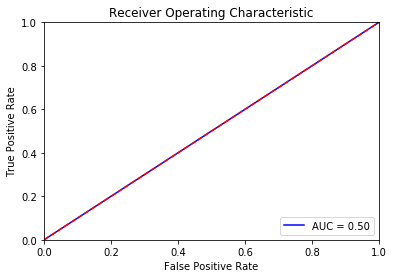

In [79]:
one_prob = guassian_probability_density_function(x_b_tr, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_b_tr, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_b_tr, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_b_tr, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_b_tr, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy of the model is 0.97295
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan
The AUC score is 0.5




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


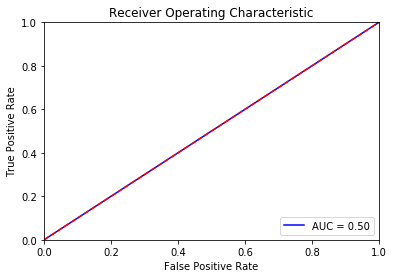

In [80]:
one_prob = guassian_probability_density_function(x_be_te, one_mean_np, one_dev_np)
one_probability = the_probability(one_prob, prior_one)
zero_prob = guassian_probability_density_function(x_be_te, zero_mean_np, zero_dev_np)
zero_probability = the_probability(zero_prob, prior_zero)
bayesian_pred = compare_probabilities(zero_probability, one_probability)
tn, fp, fn, tp = confusion_matrix(y_b_te, bayesian_pred).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

the_auc = roc_auc_score(y_b_te, bayesian_pred)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_b_te, bayesian_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
confusion_matrix(y_b_te, bayesian_pred)

array([[19459,     0],
       [  541,     0]], dtype=int64)

kNN on data set B

In [82]:
y_b = class_labels_b.values
y_b = y_b.reshape((y_b.shape[0], 1))

x_b_tr, x_be_te, y_b_tr, y_b_te = train_test_split(set_b_np, y_b, test_size=0.2, random_state=42)

x_b_tr = x_scaler.fit_transform(x_b_tr)

x_b_tr = np.concatenate((np.ones((80000,1), dtype=float), x_b_tr), axis=1)
x_be_te = np.concatenate((np.ones((20000,1), dtype=float), x_be_te), axis=1)

In [83]:
k = 2

kf = KFold(n_splits = 10)
for train, test in kf.split(x_b_tr):
    k_x_tr, k_x_te = x_b_tr[train], x_b_tr[test] 
    k_y_tr, k_y_te = y_b_tr[train], y_b_tr[test]
    predictions = []
    k_nearest_neighbor(k_x_tr, k_y_tr, k_x_te, predictions, k)
    predictions = np.asarray(predictions)
    tn, fp, fn, tp = confusion_matrix(k_y_te, predictions).ravel()
    confusion_matrix_statistics(tp, fp, tn, fn)
    k = k + 1
    print("\n")

The accuracy of the model is 0.9745
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


The accuracy of the model is 0.973875
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.97475
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.97375
The precision of the model is 0.0
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.973875
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan




C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


The accuracy of the model is 0.972375
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.973875
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.974125
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.97125
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan


The accuracy of the model is 0.972125
The precision of the model is nan
The recall of the model is 0.0
The F1 score of the model is nan




In [84]:
predictions = []
k_nearest_neighbor(x_b_tr, y_b_tr, x_be_te, predictions, k = 3)
predictions = np.asarray(predictions)

In [85]:
tn, fp, fn, tp = confusion_matrix(y_b_te, predictions).ravel()
confusion_matrix_statistics(tp, fp, tn, fn)

The accuracy of the model is 0.9711
The precision of the model is 0.02564102564102564
The recall of the model is 0.0018484288354898336
The F1 score of the model is 0.0034482758620689655


In [86]:
confusion_matrix(y_b_te, predictions)

array([[19421,    38],
       [  540,     1]], dtype=int64)

The AUC score is 0.4999478024746852




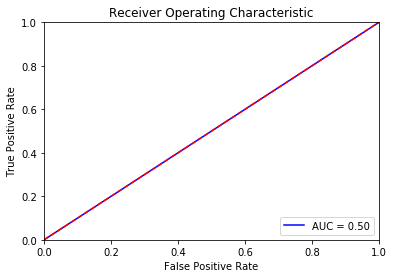

In [87]:
the_auc = roc_auc_score(y_b_te, predictions)
print("The AUC score is %s" %the_auc)
print("\n")
fpr, tpr, thresholds = roc_curve(y_b_te, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % the_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

For the model that was less likely to miss fraudulent transactions (true negatives), for data set B the NB classifier was able to predict more actual fraudulent transactions than any other model. Once again, the kNN classifier performed the worst and was only able to accurately classify one fraudulent transaction.

Based on the idea that Coinbank wants to minimize falsely accusing customers of fraudulent transactions, with data set B the model that was able to classify the least amount of incorrect fraudulent transactions (false negatives), was the NB classifier. 

Overall, and unlike the case with data set A, the best overall model for data set B was the NB classifier. The NB classifier had a higher F1-score, more true negative's predicted, and a better AUC score. Because of its better consistency and results, if I were only looking at the results from data set B, I would recommend the NB classifier. The logistic regression model performed slightly worse than NB. And, once again, the kNN classifier performed the worst and had very little true negative predictions.